<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_6/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Характеристическое сопротивление четырехполюсника. Частотные характеристики. Переход от ПФ к ФНЧ.</h1>

<h2>Задание: Исходя из заданных значений граничных частот и величины характеристического сопротивления, рассчитать параметры однозвенного ПФ (L, C1, C2). Построить графики зависимостей параметра распространения, коэффициента передачи, характеристического сопротивления и фазовой характеристики от частоты. Представить сигналы и их спектры при прохождении через реальный (LC) и идеальный ПФ (на основе БПФ).</h2>

<h3>Введем необходимые для работа библиотеки</h3>

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

<h3>Введем функции для моделирования сигнала на входе и выходе фильтра</h3>

In [ ]:
def signal1(x):
    return 1.0 + np.sin(2.0 * pi * x) + 2.0 * np.cos(4.0 * pi * x) + 0.5 * np.cos(6.0 * pi * x)


def signal2(x):
    return (1.0 * np.exp(-Gam(0.001, L, C1, C2)) + np.sin(2.0 * pi * x) * np.exp(-Gam(f, L, C1, C2)) +
            2.0 * np.cos(4.0 * pi * x) * np.exp(-Gam(2.0 * f, L, C1, C2)) +
            0.5 * np.cos(6.0 * pi * x) * np.exp(-Gam(3.0 * f, L, C1, C2)))

<h3>Введем функции для моделирования импульса на входе и выходе фильтра</h3>

In [ ]:
def ipulse(t, Tc, fn, fv):
    freq = (fv + fn) * 0.5
    dt = 1.0 / (fv - fn)
    return np.exp(-(0.5 * Tc - t) ** 2 / dt ** 2 * 0.5) * np.sin(2.0 * pi * freq * t)


def opulse(t, Tc, fn, fv, L, C1, C2):
    signal = ipulse(t, Tc, fn, fv)
    n = len(signal)
    freq = np.fft.fftfreq(n, t[1] - t[0])
    spectr = np.fft.fft(signal)
    for i in range(n):
        if freq[i] != 0:
            spectr[i] *= np.exp(-Gam(abs(freq[i]), L, C1, C2))
    return np.fft.ifft(spectr)

<h3>Введем функции для рассчета параметров фильтра и характеристического сопротивления</h3>

In [81]:
def f2w(f):
    return 2.0 * pi * f


def Z1(f, C1):
    return 2.0 / (1j * f2w(f) * C1)


def Z2(f, C2):
    return 1.0 / (1j * f2w(f) * C2 + 1)


def Z3(f, L):
    return 1.0j * f2w(f) * L


def Gam(f, L, C1, C2):
    ZY = (Z2(f, C2) + Z3(f, L)) / Z1(f, C1)
    return 2.0 * np.arcsinh(np.sqrt(ZY))


def Zw(f, L, C1, C2):
    return np.sqrt((Z1(f, C1) ** 2 * (Z2(f, C2) + Z3(f, L))) / (2 * Z1(f, C1) + Z2(f, C2) + Z3(f, L)))

<h3>Введем необходимые данные для рассчета</h3>
<h4>Входные данные:</h4>
<h5>Опорная частота сигнала: 10<br>
Временной интервал: 10<br>
Число временных отсчетов: 100000<br>
Нижняя граничная частота фильтра: 15<br>
Верхняя граничная частота фильтра: 25<br>
Характеристическое сопротивление фильтра на частоте 20: 50</h5>

In [ ]:
pulse = False

f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

fl = float(input('Нижняя граничная частота фильтра '))
fh = float(input('Верхняя граничная частота фильтра '))
f0 = (fl + fh) * 0.5
Z0 = float(input('Характеристическое сопротивление фильтра на частоте ' + str(f0) + ' '))

Опорная частота сигнала 10
Временной интервал 10
Число временных отсчетов 100000
Нижняя граничная частота фильтра 15
Верхняя граничная частота фильтра 25
Характеристическое сопротивление фильтра на частоте 20.0 50


<h3>Рассчитаем индктивность и сопротивление</h3>

In [ ]:
L = (sqrt(Z0 ** 2 * f2w(f0) ** 2 * (2 * f2w(fh) ** 2 - f2w(fl) ** 2 - f2w(f0) ** 2) /
          ((f2w(fh) ** 2 - f2w(fl) ** 2) ** 2 * (f2w(f0) ** 2 - f2w(fl) ** 2))))
C1 = 2.0 / L / (f2w(fh) ** 2 - f2w(fl) ** 2)
C2 = 1.0 / (f2w(fl) ** 2 * L)
print('Параметры фильтра:')
print('C1 = {0: f}\nC2 = {1: f}\nL = {2: f}'.format(C1, C2, L))

Параметры фильтра:
C1 =  0.000168
C2 =  0.000150
L =  0.751936


<h3>Добавим шкалу частот и рассчитаем параметры</h3>

In [ ]:
freq = np.linspace(0.8 * fl, fh * 1.2, n)

Gama = Gam(freq, L, C1, C2)
Zw = Zw(freq, L, C1, C2)
dF = (Gam(freq + 0.01, L, C1, C2).imag - Gam(freq - 0.01, L, C1, C2).imag) / 0.02

<h3>Построим графики вычислений</h3>

<h4>График</h4>

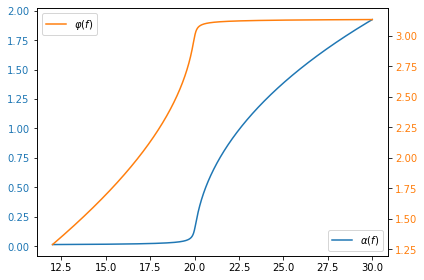

In [ ]:
plt.plot(freq, Gama.real, color='tab:blue', label=r'$\alpha(f)$')
plt.tick_params(axis='y', labelcolor='tab:blue')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, Gama.imag, color='tab:orange', label=r'$\varphi(f)$')
plt.tick_params(axis='y', labelcolor='tab:orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h4>График зависимости характеристического сопротивления от частоты</h4>

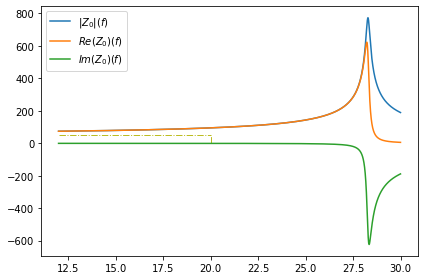

In [ ]:
plt.plot(freq, abs(Zw), label='$|Z_0|(f)$')
plt.plot(freq, Zw.real, label='$Re(Z_0)(f)$')
plt.plot(freq, Zw.imag, label='$Im(Z_0)(f)$')
plt.vlines(f0, 0, Z0, color='tab:olive', linestyles='dashdot', lw=1)
plt.hlines(Z0, freq[0], f0, color='tab:olive', linestyles='dashdot', lw=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h4>График коэффициента передачи от частоты</h4>

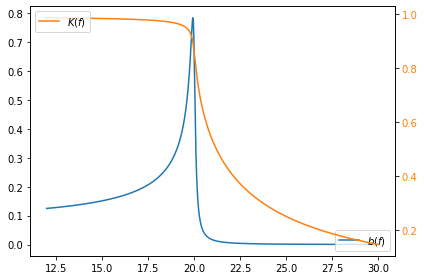

In [ ]:
plt.plot(freq, dF, label='$b(f)$')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, np.exp(-Gama.real), color='tab:orange', label=r'$K(f)$')
plt.tick_params(axis='y', labelcolor='tab:orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<h3>Введем временную шкалу и модели импульсов до и после фильтра</h3>

In [ ]:
t = np.linspace(0, T, n)
uinp = ipulse(t, T, 0.5 * fl, 1.5 * fh) if pulse else signal1(f * t)
uout = opulse(t, T, 0.5 * fl, 1.5 * fh, L, C1, C2) if pulse else signal2(f * t)

<h4>Графики входного и выходного(действительной и мнимой части) сигнала</h4>

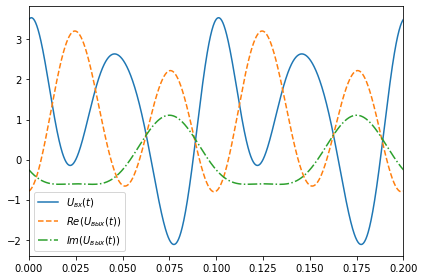

In [ ]:
plt.plot(t, uinp, label='$U_{вх}(t)$')
plt.plot(t, np.array(uout, dtype=complex).real, '--', label='$Re(U_{вых}(t))$')
plt.plot(t, np.array(uout, dtype=complex).imag, '-.', label='$Im(U_{вых}(t))$')
if pulse:
    plt.axis(xmin=T / 2 - 4 / (fh - fl), xmax=T / 2 + 4 / (fh - fl))
else:
    plt.axis(xmin=0, xmax=2 / f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<h4>Спектры входного и выходного сигнала</h4>

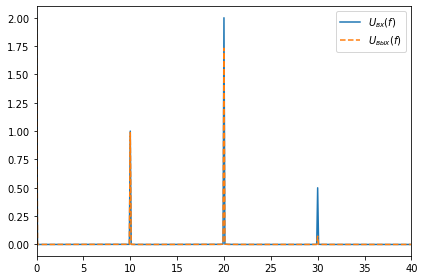

In [ ]:
sp_inp = np.fft.fft(uinp)
sp_out = np.fft.fft(uout)
freq = np.fft.fftfreq(n, T / n)

plt.plot(freq[0:n // 2], (np.hypot(sp_inp.real, sp_inp.imag) / n * 2.0)[0:n // 2], '-', label='$U_{вх}(f)$')
plt.plot(freq[0:n // 2], (np.hypot(sp_out.real, sp_out.imag) / n * 2.0)[0:n // 2], '--', label='$U_{вых}(f)$')
plt.axis(xmin=0, xmax=4 * f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
if pulse:
    plt.plot(freq[0:n // 2], (np.hypot(sp_out.real, sp_out.imag) / np.hypot(sp_inp.real, sp_inp.imag))[0:n // 2], '--',
             label='$K(f)$')
    plt.axis(xmin=0, xmax=4 * f)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

<h2>Дополнительное задание: для LC фильтра учесть наличие проводимости G, включенной параллельно емкости C2. Построить графики основных частотных характеристик и сигналов при прохождении через фильтр (аналогично основному заданию) при изменении проводимости G: G=0, G=0.01, G=1. Обратить внимание на поведение частотных характеристик в НЧ и ВЧ областях (задать в программе freq = np.linspace(0.001, fh*1.2, n)).</h2>

<h3>Изменим код Z2</h3>

In [82]:
def Z2(f, C2):
    return 1.0 / (1j * f2w(f) * C2 + G)

<h3>Введем необходимые данные</h3>
<h4>Входные данные:</h4>
<h5>Опорная частота сигнала: 10<br>
Временной интервал: 10<br>
Число временных отсчетов: 100000<br>
Нижняя граничная частота фильтра: 15<br>
Верхняя граничная частота фильтра: 25<br>
Характеристическое сопротивление фильтра на частоте 20: 50</h5>

In [57]:
pulse = False

f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

fl = float(input('Нижняя граничная частота фильтра '))
fh = float(input('Верхняя граничная частота фильтра '))
f0 = (fl + fh) * 0.5
Z0 = float(input('Характеристическое сопротивление фильтра на частоте ' + str(f0) + ' '))

Опорная частота сигнала 10
Временной интервал 10
Число временных отсчетов 100000
Нижняя граничная частота фильтра 15
Верхняя граничная частота фильтра 25
Характеристическое сопротивление фильтра на частоте 20.0 50


<h3>Зададим значения индукции и емкости</h3>

In [68]:
L = 0.751936
G = 0.01
C1 = 2.0j / (f2w(fh)*(L*f2w(fh)*1.0j + 1/(G + (f2w(fh)*(1 + G*L*f2w(fl)*1.0j)*1.0j)/(L*f2w(fl)**2))))
C2 = (1 + G*L*f2w(fl)*1.0j)/(L*f2w(fl)**2)
print('Параметры фильтра:')
print('C1 = {0: f}\nC2 = {1: f}\nL = {2: f}'.format(C1, C2, L))

Параметры фильтра:
C1 =  0.000158-0.000022j
C2 =  0.000150+0.000106j
L =  0.751936


<h3>Введем частотную шкалу</h3>

In [69]:
freq = np.linspace(0.8 * fl, fh * 1.2, n)

Gama = Gam(freq, L, C1, C2)
Zw = Zw(freq, L, C1, C2)
dF = (Gam(freq + 0.01, L, C1, C2).imag - Gam(freq - 0.01, L, C1, C2).imag) / 0.02

<h3>Построим графики</h3>

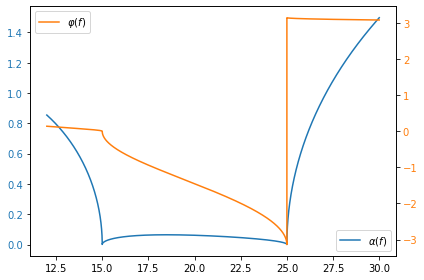

In [70]:
plt.plot(freq, Gama.real, color='tab:blue', label=r'$\alpha(f)$')
plt.tick_params(axis='y', labelcolor='tab:blue')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, Gama.imag, color='tab:orange', label=r'$\varphi(f)$')
plt.tick_params(axis='y', labelcolor='tab:orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

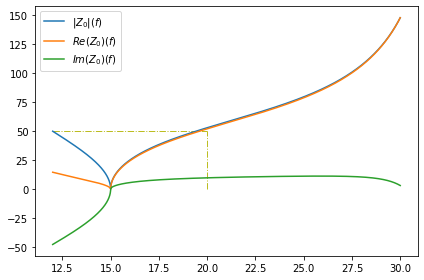

In [71]:
plt.plot(freq, abs(Zw), label='$|Z_0|(f)$')
plt.plot(freq, Zw.real, label='$Re(Z_0)(f)$')
plt.plot(freq, Zw.imag, label='$Im(Z_0)(f)$')
plt.vlines(f0, 0, Z0, color='tab:olive', linestyles='dashdot', lw=1)
plt.hlines(Z0, freq[0], f0, color='tab:olive', linestyles='dashdot', lw=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

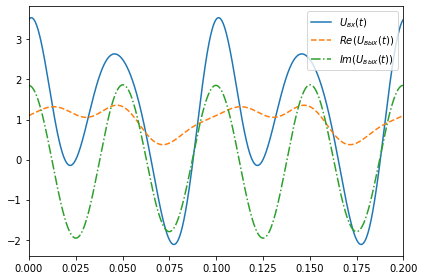

In [72]:
t = np.linspace(0, T, n)
uinp = ipulse(t, T, 0.5 * fl, 1.5 * fh) if pulse else signal1(f * t)
uout = opulse(t, T, 0.5 * fl, 1.5 * fh, L, C1, C2) if pulse else signal2(f * t)

plt.plot(t, uinp, label='$U_{вх}(t)$')
plt.plot(t, np.array(uout, dtype=complex).real, '--', label='$Re(U_{вых}(t))$')
plt.plot(t, np.array(uout, dtype=complex).imag, '-.', label='$Im(U_{вых}(t))$')
if pulse:
    plt.axis(xmin=T / 2 - 4 / (fh - fl), xmax=T / 2 + 4 / (fh - fl))
else:
    plt.axis(xmin=0, xmax=2 / f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

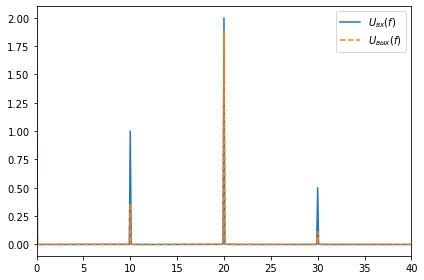

In [73]:
sp_inp = np.fft.fft(uinp)
sp_out = np.fft.fft(uout)
freq = np.fft.fftfreq(n, T / n)

plt.plot(freq[0:n // 2], (np.hypot(sp_inp.real, sp_inp.imag) / n * 2.0)[0:n // 2], '-', label='$U_{вх}(f)$')
plt.plot(freq[0:n // 2], (np.hypot(sp_out.real, sp_out.imag) / n * 2.0)[0:n // 2], '--', label='$U_{вых}(f)$')
plt.axis(xmin=0, xmax=4 * f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [83]:
L = 0.751936
G = 1
C1 = 2.0j / (f2w(fh)*(L*f2w(fh)*1.0j + 1/(G + (f2w(fh)*(1 + G*L*f2w(fl)*1.0j)*1.0j)/(L*f2w(fl)**2))))
C2 = (1 + G*L*f2w(fl)*1.0j)/(L*f2w(fl)**2)
print('Параметры фильтра:')
print('C1 = {0: f}\nC2 = {1: f}\nL = {2: f}'.format(C1, C2, L))

Параметры фильтра:
C1 =  0.000108-0.000001j
C2 =  0.000150+0.010610j
L =  0.751936


<h3>Введем частотную шкалу</h3>

In [84]:
freq = np.linspace(0.8 * fl, fh * 1.2, n)

Gama = Gam(freq, L, C1, C2)
Zw = Zw(freq, L, C1, C2)
dF = (Gam(freq + 0.01, L, C1, C2).imag - Gam(freq - 0.01, L, C1, C2).imag) / 0.02

<h3>Построим графики</h3>

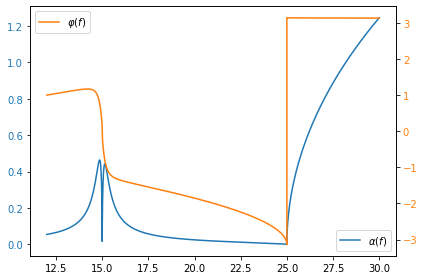

In [85]:
plt.plot(freq, Gama.real, color='tab:blue', label=r'$\alpha(f)$')
plt.tick_params(axis='y', labelcolor='tab:blue')
plt.legend(loc='lower right')
plt.twinx()
plt.plot(freq, Gama.imag, color='tab:orange', label=r'$\varphi(f)$')
plt.tick_params(axis='y', labelcolor='tab:orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

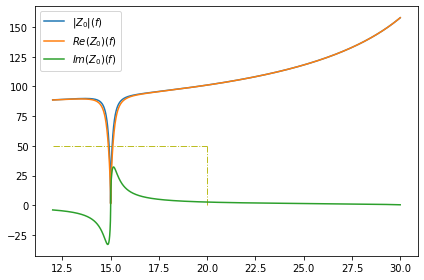

In [86]:
plt.plot(freq, abs(Zw), label='$|Z_0|(f)$')
plt.plot(freq, Zw.real, label='$Re(Z_0)(f)$')
plt.plot(freq, Zw.imag, label='$Im(Z_0)(f)$')
plt.vlines(f0, 0, Z0, color='tab:olive', linestyles='dashdot', lw=1)
plt.hlines(Z0, freq[0], f0, color='tab:olive', linestyles='dashdot', lw=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

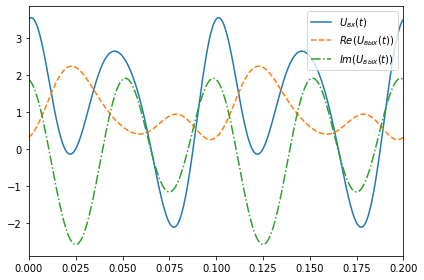

In [87]:
t = np.linspace(0, T, n)
uinp = ipulse(t, T, 0.5 * fl, 1.5 * fh) if pulse else signal1(f * t)
uout = opulse(t, T, 0.5 * fl, 1.5 * fh, L, C1, C2) if pulse else signal2(f * t)

plt.plot(t, uinp, label='$U_{вх}(t)$')
plt.plot(t, np.array(uout, dtype=complex).real, '--', label='$Re(U_{вых}(t))$')
plt.plot(t, np.array(uout, dtype=complex).imag, '-.', label='$Im(U_{вых}(t))$')
if pulse:
    plt.axis(xmin=T / 2 - 4 / (fh - fl), xmax=T / 2 + 4 / (fh - fl))
else:
    plt.axis(xmin=0, xmax=2 / f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

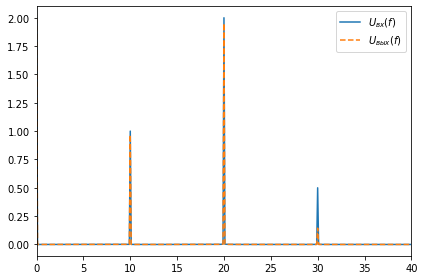

In [88]:
sp_inp = np.fft.fft(uinp)
sp_out = np.fft.fft(uout)
freq = np.fft.fftfreq(n, T / n)

plt.plot(freq[0:n // 2], (np.hypot(sp_inp.real, sp_inp.imag) / n * 2.0)[0:n // 2], '-', label='$U_{вх}(f)$')
plt.plot(freq[0:n // 2], (np.hypot(sp_out.real, sp_out.imag) / n * 2.0)[0:n // 2], '--', label='$U_{вых}(f)$')
plt.axis(xmin=0, xmax=4 * f)
plt.legend(loc='best')
plt.tight_layout()
plt.show()